In [1]:
import sys
sys.path.insert(1, '/Users/christineegan/AppleM1SentimentAnalysis/notebooks/program/app/final/src')

import pandas as pd
import numpy as np

from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

from eda_visualizations import *

In [2]:
df = pd.read_csv('/Users/christineegan/AppleM1SentimentAnalysis/data/combined_data/2021-02-02_01_14_46.csv')

# Exploratory Data Analysis

### Class Distribution

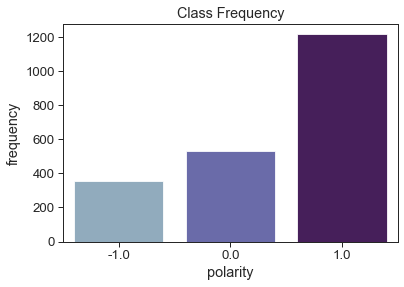

In [3]:
sentiment_frequency(df)

#### Class Imbalance
Examining the target feature (polarity), it appears that there is a class imbalance. There are nearly 1,200 observations of positive opinions, while there are only about 600 neutral opinions. There are even less (about 350) negative opinions.

### Relationships Between Features

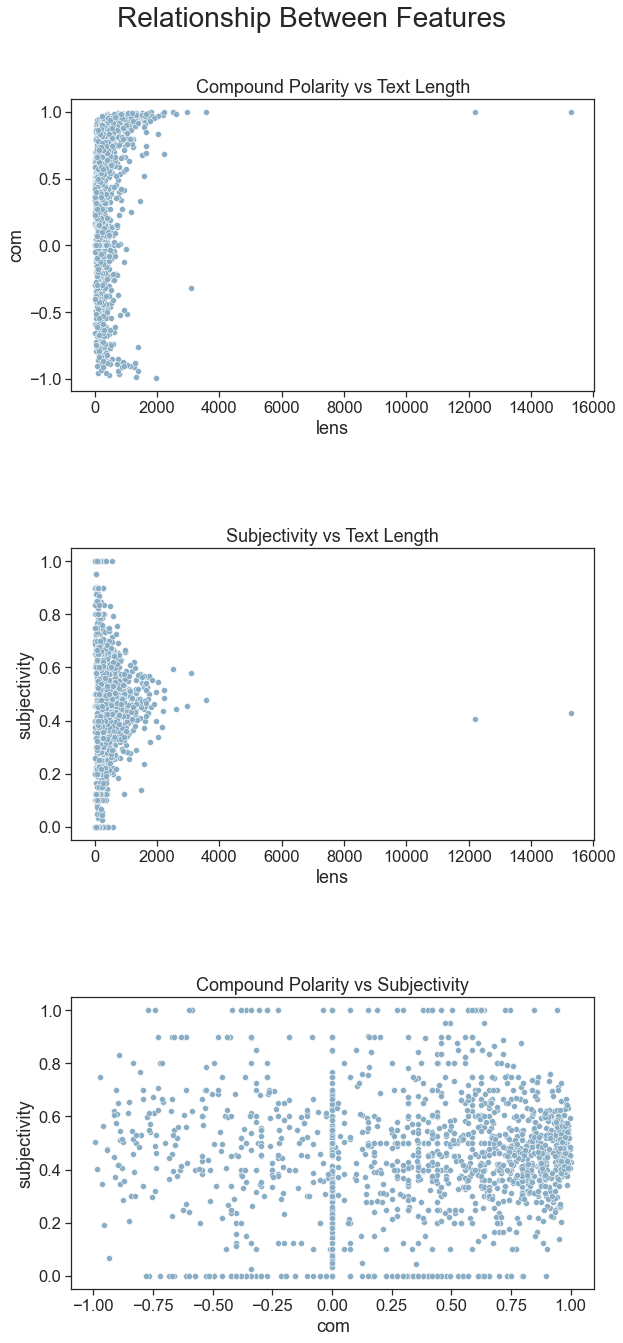

In [4]:
relationship_between_features(df)

#### Compound Polarity vs Text Length
The plot seems to indicate that most of the observations were less than 1500 words long, with most of those observations appearing to be less than 500. This is not suprising, because a lot of the corpus was taken from tweets, which are capped below 280 characters. There seems to be a small positive correlation between text length and a higher polarity score.

#### Subjectivity vs Text Length
There seems to be an association between a mid-range subjectivity score and text length. Longer observations seem to be clustered around mid level subjectivity (0.4 - 0.6). There is a possibility that users who wrote longer and more thoughtful posts made an effort to be more objective when describing their experience.

#### Compound Polarity vs Subjectivity
There seems to be an association between higher compound polarity and mid-level subjectivity. 

### Word Frequency by Sentiment

In [5]:
pos_df, neu_df, neg_df = divide_df(df)
titles = ['Positive', 'Neutral', 'Negative']


[*]Dividing data frame by polarity...


In [6]:
pos_words = count_words(pos_df)[:20]
neu_words = count_words(neg_df)[:20]
neg_words = count_words(neu_df)[:20]

#### WordClouds: Most Frequent Words by Class

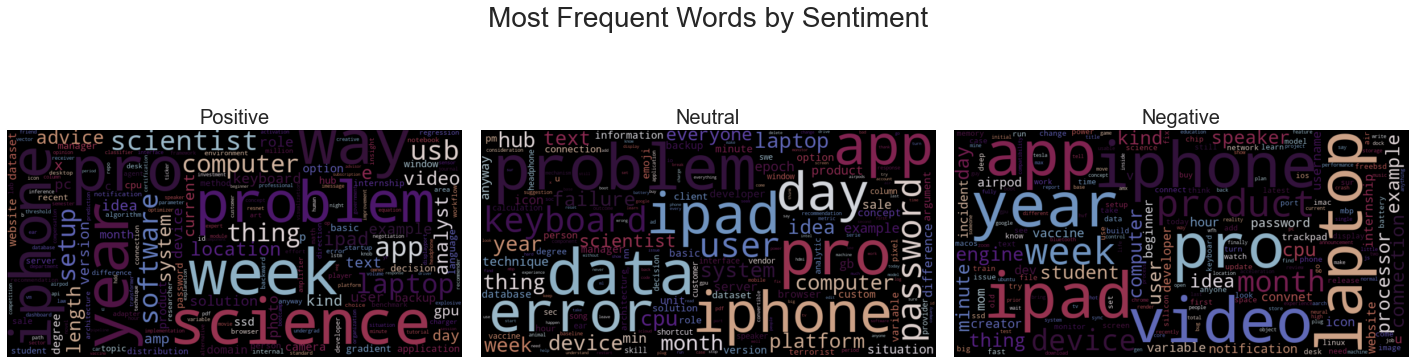

In [7]:
wordclouds_by_sentiment(pos_df, neg_df, neu_df, titles)

#### Word Frequemcy by Sentiment: 20 Most Frequent

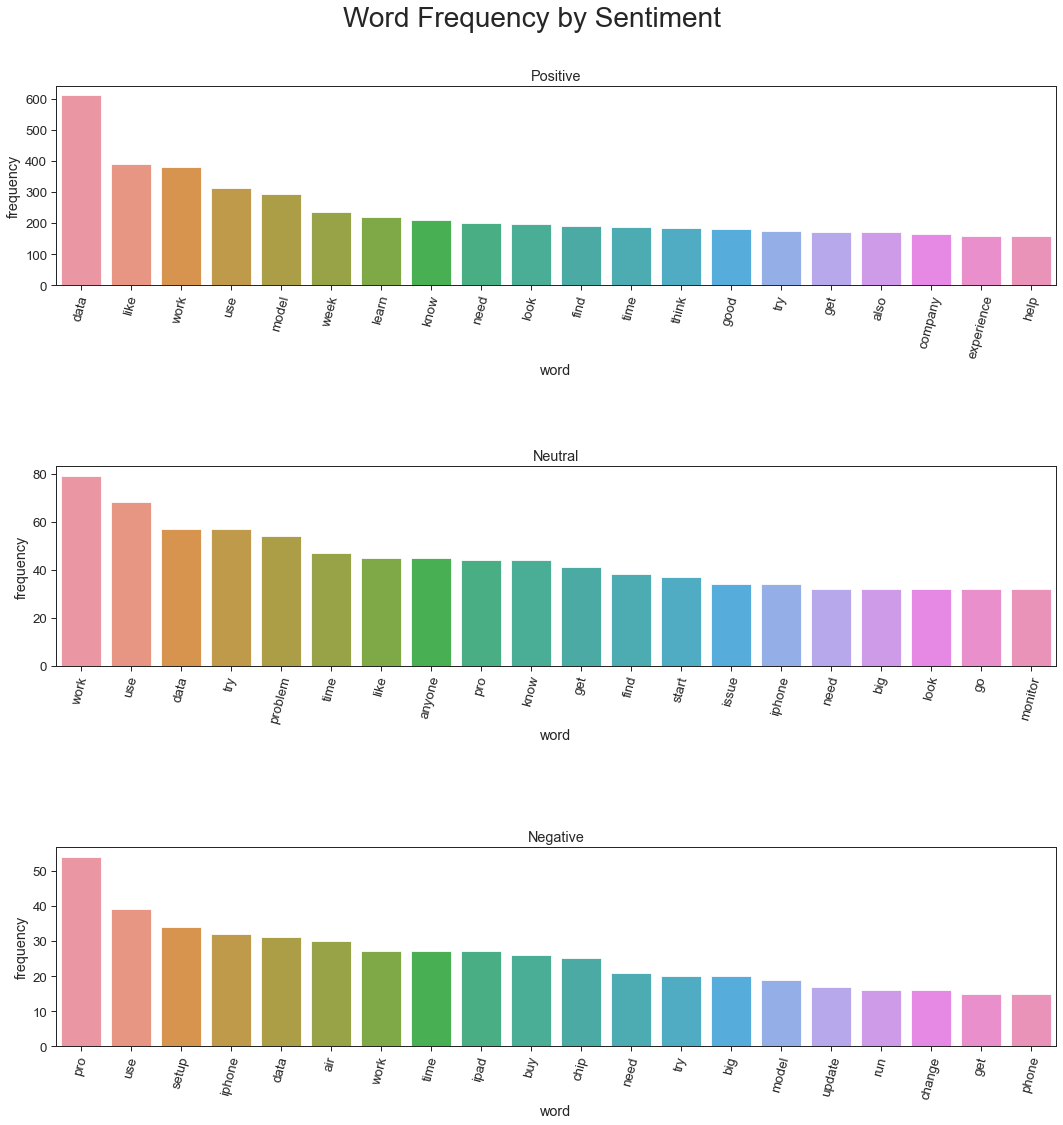

In [8]:
data = [pos_words, neu_words, neg_words]
sup_title = 'Word Frequency by Sentiment'
word_frequency_by_sentiment(data, titles, sup_title)

### POS Tag Counts

['NN', 'JJ', 'VBP', 'NNS', 'RB', 'VB', 'IN', 'VBD']
Unique Positive POS Tags
['VBZ', 'JJS']

Unique Neutral POS Tags
['FW', 'JJR']

Unique Negative POS Tags
['VBN', 'VBZ']



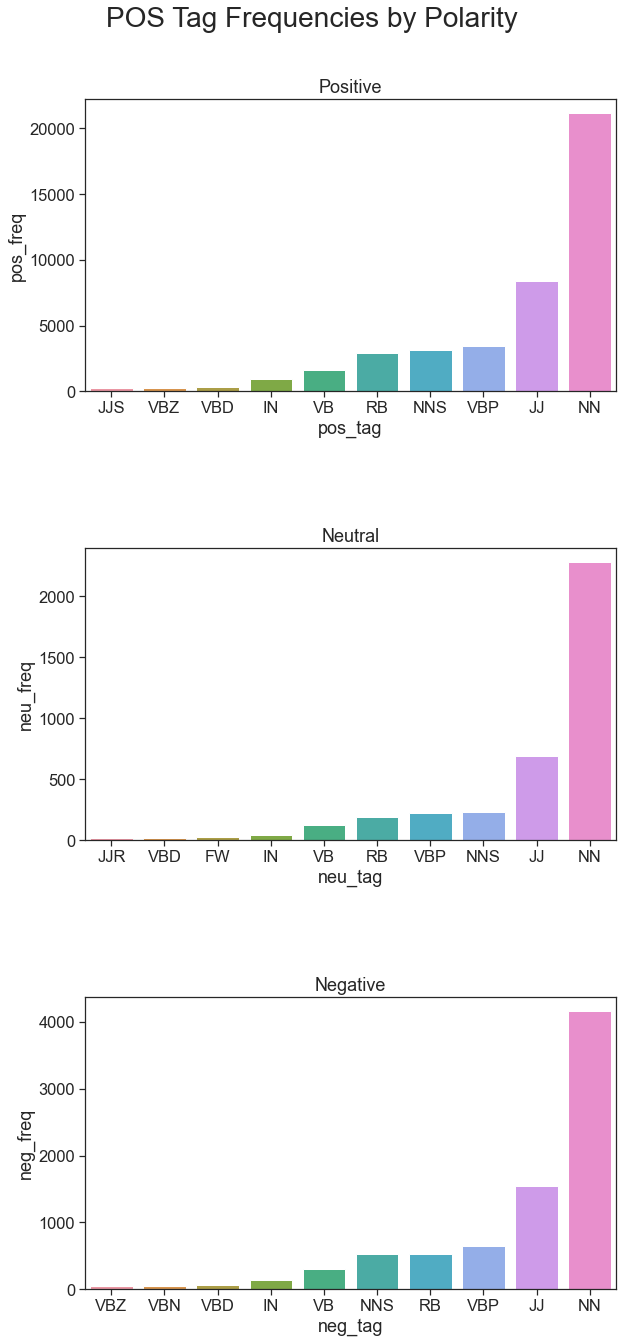

In [9]:
pos_tag_frequency_by_sentiment(pos_df, neu_df, neg_df)

Key to reading NLTK Wordnet POS Tag Abbreviations: https://www.guru99.com/pos-tagging-chunking-nltk.html

#### POS Tag Distributions
Based on the ten most frequent POS tags for each class, positive, negative, and neutral observations all had some combination of the following tags:    
'NN' (singular nouns) , 'JJ' (simple adjectives), 'VBP' (present tense, first person verbs), 'NNS' (plural nouns), 'RB' (adverbs), 'VB' (simple verb) , 'IN' (preposition, subordinating conjunction), 'VBD' (past tense verb).     
**Example:** I quickly drove to the Apple Store to buy a new Mac mini and there were a lot of cars on the road so there was traffic.   
This is a pretty typical distribution  of words, so it is interesting to look at which words are unique to each class to see what kinds of words seem to tip the scales of the polarity score in one direction or the other.

#### Unique Positive Tags
1. 'VBZ' (verb, present tense with 3rd person singular, i.e. bases)
2. 'JJS' (superlative adjectives, i.e. largest) 

* It isn't suprising that we see superlatives present in positive observations. It is interesting however that in with negative observations we don't see this mirrored.

#### Unique Neutral Tags
1. 'FW' (foreign word)
2. 'JJR' (comparative adjective, i.e. larger)

* This might point to a problem with the data -- if  observations contain a lot of foreign words and VADER is unable to capture their sentiment in the calculation, it might lead to an assignment neutral polarity when in fact another sentiment was expressed by the author. In the future, it might be best to look into what constitutes as a foreign word (are they truly foreign words, or just slang?). It also might be helpful to add something to this app to better detect slang and foreign words and account for that in the polarity score. 

#### Unique Negative Tags
1. 'VBN' (verb past participle, i.e. reunified)
2. 'VBZ' (verb, present tense with 3rd person singular, i.e. bases)

* Both positive and negative classes have VBZ. 
* Among all groups, singular nouns (NN) are the most frequent parts of speech, followed by un-inflected adjectives (JJ, i.e. 'large' not comparitve (larger) or superlative (largest)).
* In both positive and negative observations, verbs (VBP, present tense not 3rd person singular) are the third most frequent tag, while plural nouns (NNS) was the third most fequent in 